# Suicide Rates Overview 1985 to 2016

Yuxin Zhao
<br>
Created: 11/08/2019
<br>
Last update: 12/17/2019

## Question:
### 1. Explortary analysis include single factor only.
1. How does suicide rates change over time?
<br>
2. How does suicide per 100K affected by gender, age, and generation?
<br>
3. Which country has the highest suicide number during 1985 to 2015?
<br>
4. Does GDP affect suicide rate?

### 2. Supervised learning methodology 
1. Which factor tested above affect the total number of suicide the most? 


## Introduction
This suicide dataset pulled information from 4 datasets linked by time and place, and was built to find global suicide rates in relationship with socio-economic spectrum and demographic factors.  This dataset contains suicide information from 1985 to 2016 across 101 countries around the world. Due to the information collected in 2016 was incomplete, the following analysis will not include this partial of data.

This study included three parts of analysis. Exploratory analysis aims to understand the trends of global suicide rate varied by demographic, socio-economic, and geographic factors. One supervised learning methodology aims to understand which factors contribute to increase the rate of suicide. 

## Codebook
Population = Population appears to be at a country & year & sex & age level. 

Total Suicides = Number of suicides in each country & year & sex & age level. 

Suicides by 100k people = Number of suicides divided by the population size and multiplied by 100.000. 

gdpFY = Gross Domestic Product at the year of person's suicide

gdpPC = Gross Domestic Product per capita at the year of person's suicide

Generation

In [58]:
from tabulate import tabulate
table = [["G.I. Generation","1910 to 1924","102"],
         ["Silent Generation","1925 to 1945","84"],
         ["Baby Boomer","1946 to 1964","64"],
         ["Generation X","1965 to 1979","47"],
         ["Millenials","1980 to 1994","32"],
         ["Generation Z","1995 to 2012","17"]]
print(tabulate(table, headers=["Generation", "Birth Range","Age of Today"]))


Generation         Birth Range      Age of Today
-----------------  -------------  --------------
G.I. Generation    1910 to 1924              102
Silent Generation  1925 to 1945               84
Baby Boomer        1946 to 1964               64
Generation X       1965 to 1979               47
Millenials         1980 to 1994               32
Generation Z       1995 to 2012               17


## Analysis Process:

### 1. Library, data loading, and preanalysis

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from scipy.stats import randint

SR = pd.read_csv("/Suicide Rates Overview 1985 to 2016/master.csv")


In [4]:
#Rename the columns
SR.columns = ['country','year','sex','age','suicidesN','population','suicides100kpop','countryYear', 'HDI for year', 'gdpFY','gdpPC', 'generation']

In [5]:
# Print the first 10 rows
SR.head(10)

,country,year,sex,age,suicidesN,population,suicides100kpop,countryYear,HDI for year,gdpFY,gdpPC,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [6]:
# Print the last 10 rows
SR.tail(10)

,country,year,sex,age,suicidesN,population,suicides100kpop,countryYear,HDI for year,gdpFY,gdpPC,generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [7]:
# keep the variables that only interest in this study
SR_N = SR[['country', 'year', 'sex', 'age', 'suicidesN', 'population',
       'suicides100kpop','gdpFY', 'gdpPC','generation']]

In [8]:
# Review the column names
SR_N.columns

Index(['country', 'year', 'sex', 'age', 'suicidesN', 'population',
       'suicides100kpop', 'gdpFY', 'gdpPC', 'generation'],
      dtype='object')

In [9]:
# Review the row index
SR_N.index

RangeIndex(start=0, stop=27820, step=1)

In [10]:
# Review the types of each column
SR_N. dtypes

country             object
year                 int64
sex                 object
age                 object
suicidesN            int64
population           int64
suicides100kpop    float64
gdpFY               object
gdpPC                int64
generation          object
dtype: object

In [11]:
# GDP for year should be numerical variable.
SR_N['gdpFY'] = SR_N['gdpFY'].str.replace(',','').astype(int)

/Users/yuxin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 1.1 Data Cleaning

In [12]:
# Concise summary to quickly review the nulls
SR_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
country            27820 non-null object
year               27820 non-null int64
sex                27820 non-null object
age                27820 non-null object
suicidesN          27820 non-null int64
population         27820 non-null int64
suicides100kpop    27820 non-null float64
gdpFY              27820 non-null int64
gdpPC              27820 non-null int64
generation         27820 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [13]:
# Count the missing values in each column. 
print((SR_N.isnull().sum()))

country            0
year               0
sex                0
age                0
suicidesN          0
population         0
suicides100kpop    0
gdpFY              0
gdpPC              0
generation         0
dtype: int64


### 2. Descriptive Statistics

In [14]:
SR_N.describe

<bound method NDFrame.describe of           country  year     sex          age  suicidesN  population  \
0         Albania  1987    male  15-24 years         21      312900   
1         Albania  1987    male  35-54 years         16      308000   
2         Albania  1987  female  15-24 years         14      289700   
3         Albania  1987    male    75+ years          1       21800   
4         Albania  1987    male  25-34 years          9      274300   
...           ...   ...     ...          ...        ...         ...   
27815  Uzbekistan  2014  female  35-54 years        107     3620833   
27816  Uzbekistan  2014  female    75+ years          9      348465   
27817  Uzbekistan  2014    male   5-14 years         60     2762158   
27818  Uzbekistan  2014  female   5-14 years         44     2631600   
27819  Uzbekistan  2014  female  55-74 years         21     1438935   

       suicides100kpop        gdpFY  gdpPC       generation  
0                 6.71   2156624900    796     Gene

In [15]:
# Summary of categorical variable features.
SR_N.describe(include=['O'])

,country,sex,age,generation
count,27820,27820,27820,27820
unique,101,2,6,6
top,Iceland,female,55-74 years,Generation X
freq,382,13910,4642,6408


In [16]:
# Specficy the number of gender and age distributed in this dataset
SR_N.sex.value_counts()

female    13910
male      13910
Name: sex, dtype: int64

In [17]:
SR_N.age.value_counts()

55-74 years    4642
25-34 years    4642
75+ years      4642
35-54 years    4642
15-24 years    4642
5-14 years     4610
Name: age, dtype: int64

In [18]:
SR_N.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [19]:
SR_N.year.value_counts()

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

The total suicide number drop sharply in 2015. With the comparison with precious year's suicide number, this significantly drop might be problematic. It is hard to believe the suicide number could be drop significanly with one year. With this consideration, i will drop the dataset collected in 2016.

In [20]:
SR_N = SR_N.loc[SR.year 7 2016,:]

In [21]:
SR_N.describe()

,year,suicidesN,population,suicides100kpop,gdpFY,gdpPC
count,27660.000000,27660.000000,2.766000e+04,27660.000000,2.766000e+04,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,4.471009e+11,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,1.457574e+12,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,8.976208e+09,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,4.801361e+10,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,2.602024e+11,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [22]:
SR_N.year.value_counts()

2009    1068
2010    1056
2001    1056
2011    1032
2003    1032
2002    1032
2007    1032
2000    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
Name: year, dtype: int64

## Insights from Part 2 analysis
1. In total, this suicide data collecrted from 101 countries during 1985 to 2016. 
2. This dataset investigated same number of male and female participants distributed equally into 5 age group. Participants aged between 5 to 14 have a lower number of participants versus the other 5 age groups. 
4. Generation X are the people who born between 1965 and 1980 have more participants than other generations. 
5. The global average suicide rate is 13.1 deaths per 100K population per year from 1985 to 2016.

### 3. Explortary analysis

#### 3.1 How does suicide rates changed over time?

In [23]:
# Create a new variable named as 'suicide by 100K pople' calculated by the sum of suicide number devided by the sum of population grouped by year.
n_dict = {'country':'nunique', 'population':'sum','suicidesN':'sum'}
year_data = SR_N[['year', 'country', 'population', 'suicidesN']].groupby('year', as_index=False).agg(n_dict)
year_data['suicide by 100K pople'] = 100000 * (year_data['suicidesN'])/ (year_data['population'])

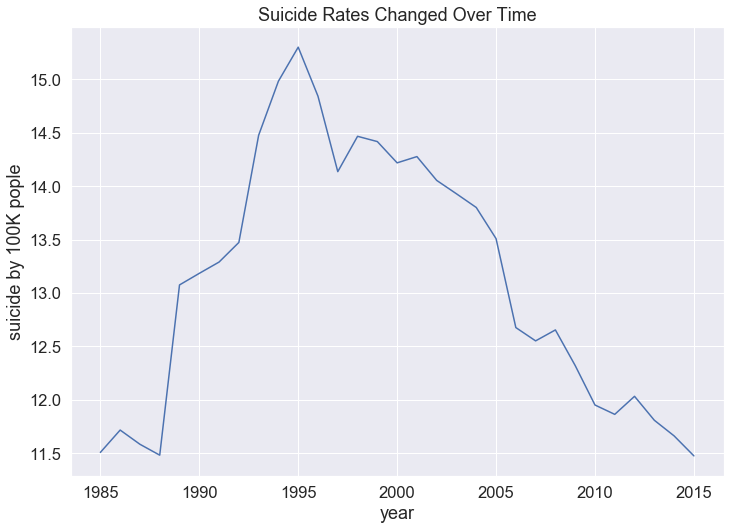

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.lineplot(x="year", y="suicide by 100K pople",
             data=year_data).set_title("Suicide Rates Changed Over Time")
plt.show()

#### 3.2 How does suicide per 100K affected by gender, age, and generation?

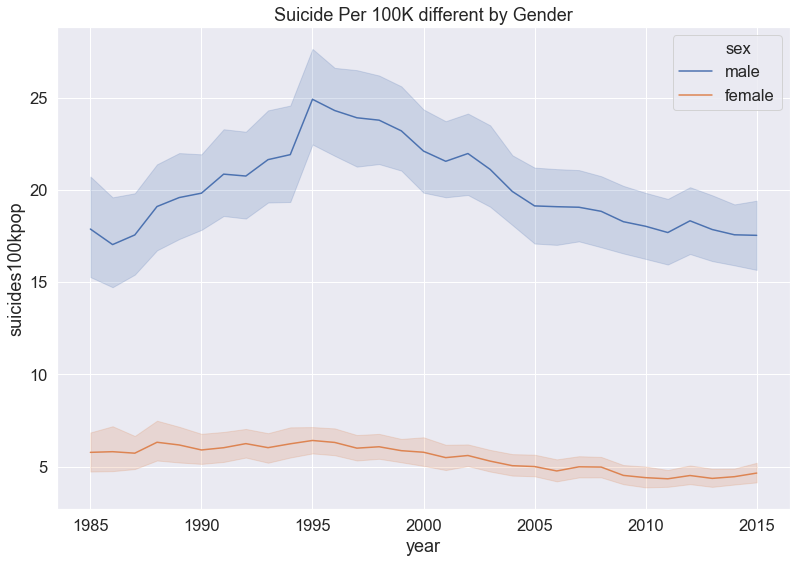

In [55]:
# How does suicide per 100K affected by gender?
sns.lineplot(x="year", y="suicides100kpop",
             hue="sex",
             data=SR_N).set_title("Suicide Per 100K different by Gender")
plt.show()


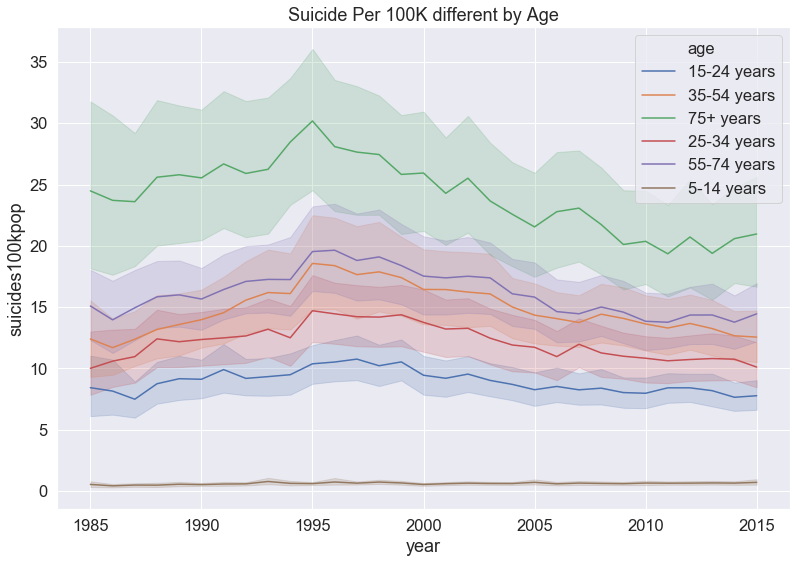

In [56]:
# How does suicide per 100K affected by age?
sns.lineplot(x="year", y="suicides100kpop",
             hue="age",
             data=SR_N). set_title("Suicide Per 100K different by Age")
plt.show()

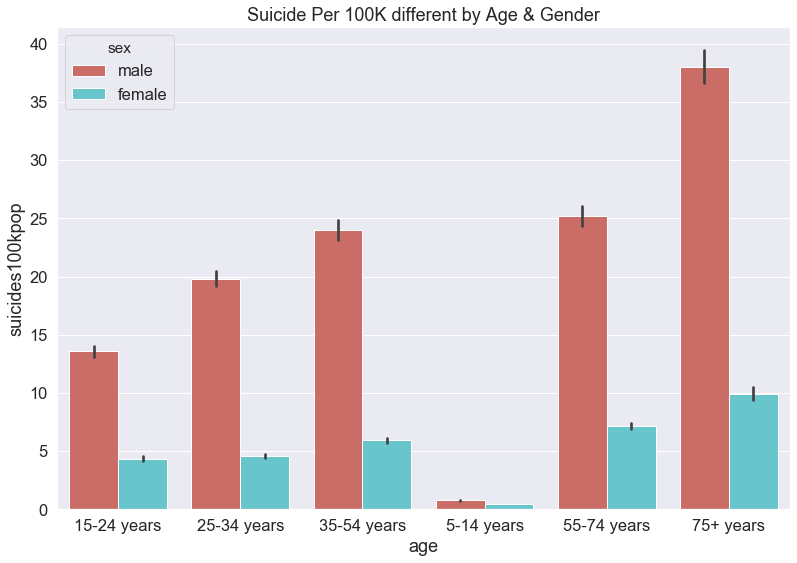

In [57]:
# How does suicide per 100K affected by gender in different age group?
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.barplot(x = SR_N.age.sort_values(),y = 'suicides100kpop',
            hue='sex',
            data=SR_N,palette='hls'). set_title("Suicide Per 100K different by Age & Gender")
plt.show()

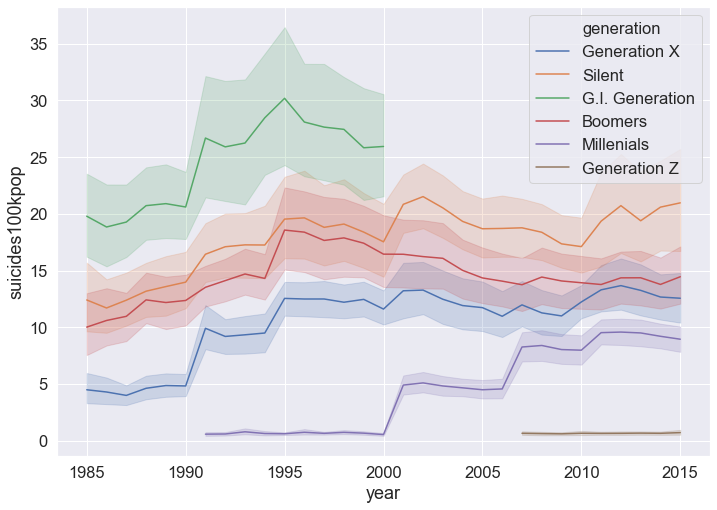

In [28]:
# How does suicide per 100K affected by generation?
sns.lineplot(x="year", y="suicides100kpop",
             hue="generation",
             data=SR_N)
plt.show()

#### 3.3 Which country has the highest suicide number during 1985 to 2015?

/Users/yuxin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

by argument to sort_index is deprecated, please use .sort_values(by=...)



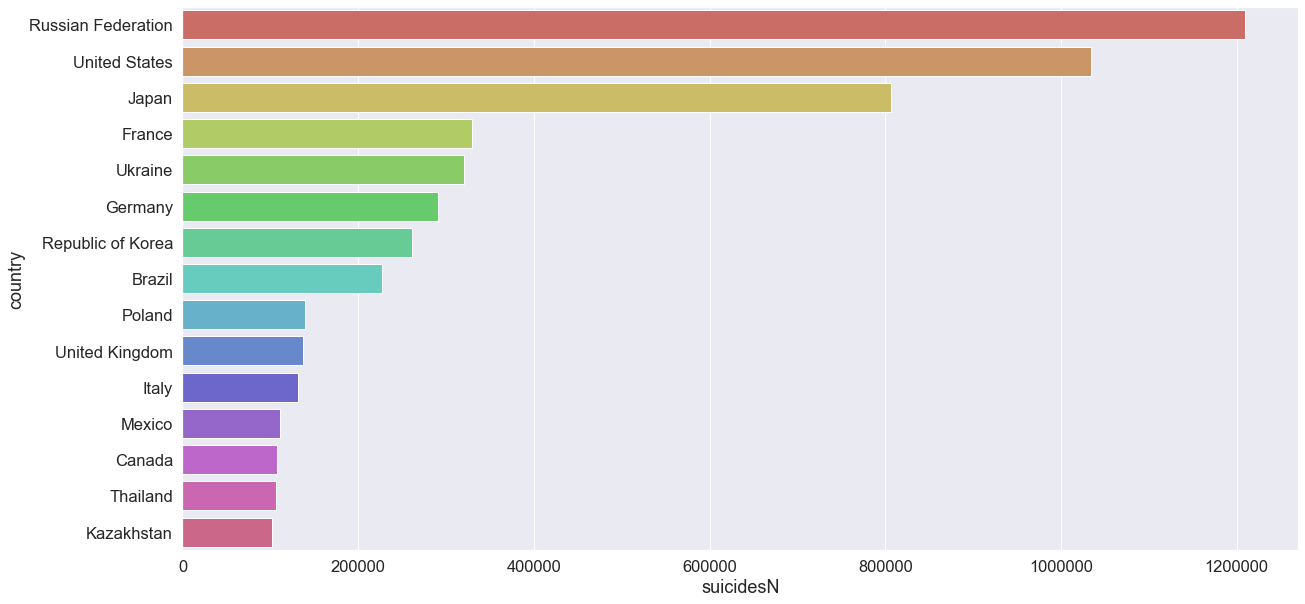

In [29]:
suic_sum = pd.DataFrame(SR_N['suicidesN'].groupby(SR_N['country']).sum())
suic_sum = suic_sum.reset_index().sort_index(by='suicidesN',ascending=False)
most_n = suic_sum.head(15)

plt.figure(figsize=(20,10))
sns.barplot(x= "suicidesN", y="country",
              data = most_n, palette = 'hls')
plt.show()


#### 3.4 Does GDP affect suicide rate?

In [59]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

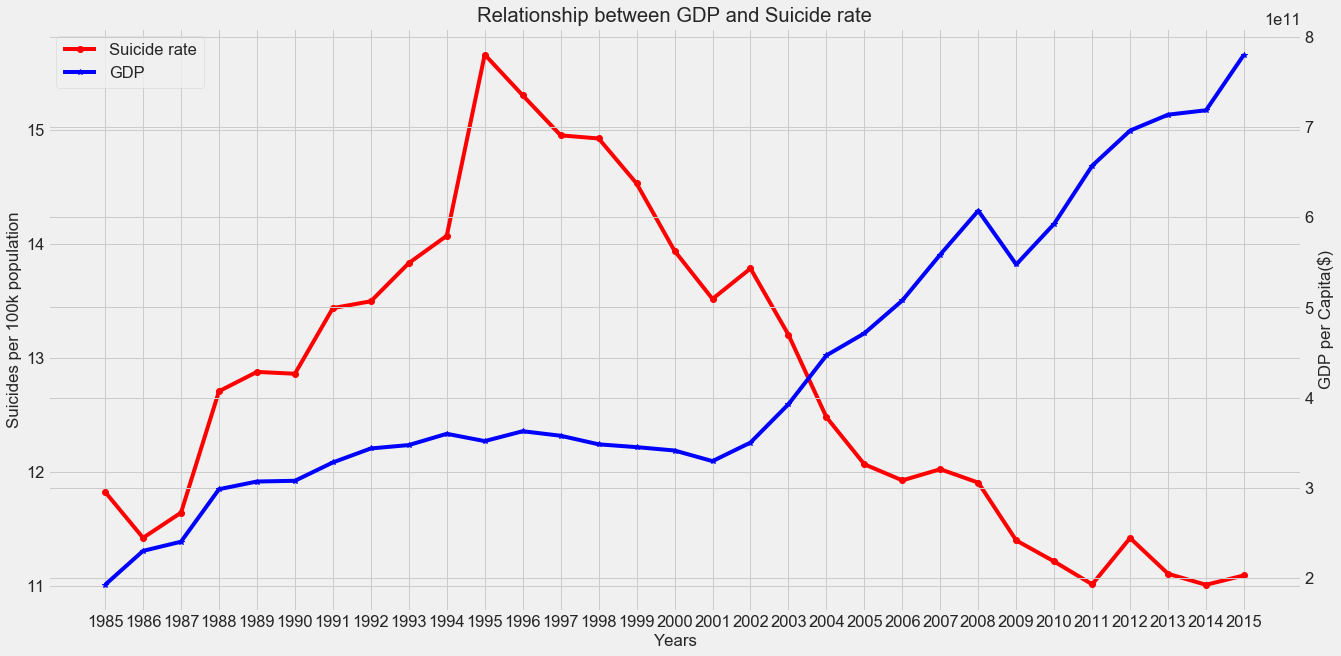

In [60]:
GDP_Year = SR_N[['year','suicides100kpop', 'gdpFY']].groupby('year').mean().reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
year_SR = ax.plot(GDP_Year['year'],GDP_Year['suicides100kpop'],
                       marker='o',color = 'RED', 
                       label='Suicide rate')
ax2 = ax.twinx()
year_GDP = ax2.plot(GDP_Year['year'],GDP_Year['gdpFY'],
                    marker='*',color = 'BLUE', 
                    label='GDP')

lns = year_SR + year_GDP
labels = [l.get_label() for l in lns]
ax.legend(lns, labels, loc=2)

ax.set_ylabel('Suicides per 100k population')
ax2.set_ylabel('GDP per Capita($)')
ax.set_xlabel('Years')
ax.set(xticks=SR_N['year'].unique());
plt.title('Relationship between GDP and Suicide rate');

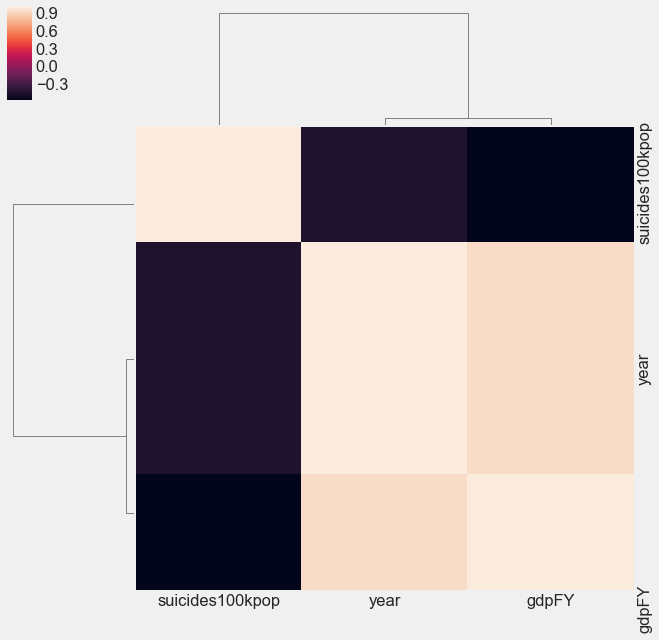

In [63]:
sns.clustermap(GDP_Year.corr())

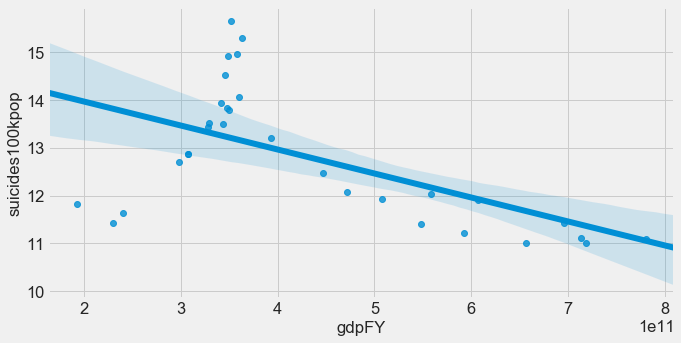

In [66]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.regplot(x='gdpFY', y='suicides100kpop',data=GDP_Year)
plt.show()

## Insights from Part 3 analysis
1. The rate of suicide reach to the peak in 1995 and decrese over time.
<br>
2. Overall, male has a higher number of suicide per 100K than female. The suicide number within both of these group decrease overtime.
<br>
3. Millennials generation is the only group shows a constantly increase suicide rate over time versus the other generations.
<br>
4. The suicide rate within each age group shows a constantly decrease over time since 1995. 
<br>
5. Male constantly has a higher suicide rate versus female across different age groups.
<br>
6. During 1995 to 2015, Russian Federation has the highest suicide number, following by United States and Japan.
<br>
7. GDP as we expected keep increase over time. However, the chart did not shown us a clear relationship between GDP and the rate of suicide. The correlation coefficient indicated that there is a negative relationship between GDP and suicide per 100K population. However, as the data plot here does not meet the assumptions of linear regression. Negative relationship interpretation here might not applicable. 

### 4. Supervised Learning Methodology

#### 4.1 Lineear Regression and five-folder cross-validation

In [33]:
SR_N.columns

Index(['country', 'year', 'sex', 'age', 'suicidesN', 'population',
       'suicides100kpop', 'gdpFY', 'gdpPC', 'generation'],
      dtype='object')

In [34]:
SLM = SR_N[['sex', 'age', 'suicidesN']]

#### Create dummy variable on age and gender.

In [68]:
age_dummies = pd.get_dummies(SLM.age, prefix='age')
age_dummies.sample(n=5, random_state=1)

,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
23583,0,0,1,0,0,0
21655,0,0,0,0,0,1
13554,0,0,0,1,0,0
482,0,0,1,0,0,0
5587,0,0,0,1,0,0


In [69]:
## I did not select the fist age group (5-14) as the baseline was because this group has a small sample size.
age_dummies.drop(age_dummies.columns[2], axis=1, inplace=True)
age_dummies = pd.concat([SLM, age_dummies], axis=1)
age_dummies.sample(n=5, random_state=1)

,sex,age,suicidesN,age_15-24 years,age_25-34 years,age_5-14 years,age_55-74 years,age_75+ years
23583,female,35-54 years,154,0,0,0,0,0
21655,male,75+ years,0,0,0,0,0,1
13554,male,5-14 years,58,0,0,1,0,0
482,female,35-54 years,0,0,0,0,0,0
5587,male,5-14 years,12,0,0,1,0,0


In [37]:
gender_dummies = pd.get_dummies(SLM.sex, prefix='sex')
gender_dummies.sample(n=5, random_state=1)

,sex_female,sex_male
23583,1,0
21655,0,1
13554,0,1
482,1,0
5587,0,1


In [38]:
gender_dummies.drop(gender_dummies.columns[0], axis=1, inplace=True)

In [70]:
final_dummies = pd.concat([age_dummies, gender_dummies], axis=1)
final_dummies.sample(n=10, random_state=1)

,sex,age,suicidesN,age_15-24 years,age_25-34 years,age_5-14 years,age_55-74 years,age_75+ years,sex_male
23583,female,35-54 years,154,0,0,0,0,0,0
21655,male,75+ years,0,0,0,0,0,1,1
13554,male,5-14 years,58,0,0,1,0,0,1
482,female,35-54 years,0,0,0,0,0,0,0
5587,male,5-14 years,12,0,0,1,0,0,1
15620,female,75+ years,5,0,0,0,0,1,0
543,female,5-14 years,0,0,0,1,0,0,0
13713,male,55-74 years,5477,0,0,0,1,0,1
27279,female,5-14 years,0,0,0,1,0,0,0
22886,female,35-54 years,55,0,0,0,0,0,0


In [40]:
final_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 9 columns):
sex                27660 non-null object
age                27660 non-null object
suicidesN          27660 non-null int64
age_15-24 years    27660 non-null uint8
age_25-34 years    27660 non-null uint8
age_35-54 years    27660 non-null uint8
age_55-74 years    27660 non-null uint8
age_75+ years      27660 non-null uint8
sex_male           27660 non-null uint8
dtypes: int64(1), object(2), uint8(6)
memory usage: 2.3+ MB


#### Instantiate a linear regression model object predicting number of suicide.

In [72]:
import statsmodels.api as sm

In [73]:
feature_cols = ['sex_male','age_15-24 years', 'age_25-34 years', 'age_5-14 years', 'age_55-74 years', 'age_75+ years']

X = final_dummies[feature_cols]
y = final_dummies.suicidesN
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/yuxin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/yuxin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/yuxin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/yuxin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/yuxin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/yuxin/opt/anaconda3/lib

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              suicidesN   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:07:37   Log-Likelihood:            -2.2676e+05
No. Observations:               27660   AIC:                         4.535e+05
Df Residuals:                   27653   BIC:                         4.536e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             399.7630     13.993     28.569      0.000     372.337     427.189
sex_male          261.8080     10.577     24.751      0.000     241.076     282.540
age_15-24 years  -355.5375     18.321    -19.406      0.000    -391.447    -319.628
age_25-34 years  -287.3174     18.321    -15.683      0.000    -323.227    -251.408
age_5-14 years   -519.3299     18.321    -28.347      0.000    -555.239    -483.420
age_55-74 years  -171.9408     18.321     -9.385      0.000    -207.850    -136.031
age_75+ years    -389.3957     18.321    -21.254      0.000    -425.305    -353.486
==============================================================================
Omnibus:                    43663.416   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29117303.537
Skew:                          10.213   Prob(JB):                         0.00
Kurtosis:                     160.630   Cond. No.                         7.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Instantiate a linear regression model object predicting number of suicide.

In [42]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients
print(linreg.intercept_)
print(list(zip(feature_cols,linreg.coef_)))

-119.56691973969606
[('sex_male', 261.80802603036864), ('age_15-24 years', 163.79240780910976), ('age_25-34 years', 232.0125813449021), ('age_35-54 years', 519.3299349240787), ('age_55-74 years', 347.3891540130147), ('age_75+ years', 129.934273318872)]


#### Evalute this model using five-folder cross-validation.

In [43]:
from sklearn import model_selection

In [44]:
from sklearn import metrics

In [45]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [46]:
mse_values = []
scores = []
n = 0

print("Cross Validation For Each Fold")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("Summary of Cross Validation")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

Cross Validation For Each Fold
Model 1
MSE: 726841.5291389183
R2: 0.05447341825133112

Model 2
MSE: 726390.3665892171
R2: 0.05449842347295364

Model 3
MSE: 1034611.8327656481
R2: 0.05437245524638512

Model 4
MSE: 744404.8451029917
R2: 0.05449160198070857

Model 5
MSE: 637198.5588332536
R2: 0.05445717059097188

Summary of Cross Validation
Mean of MSE for all folds: 773889.4264860058
Mean of R2 for all folds: 0.054458613908470066


In [47]:
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

773894.1178785089
0.05400296974503627


## Insights from Part 4 analysis
1. The overall R square is pretty small. In other words, we cannot simply use age and gender to interpret the variance of suicide.
2. All groupds listed here are significantly different with the baseline.
3. The result generate from five-folder cross-validation here generated less overall error versus the single model. However, the difference is small.